In [1]:
from Config import Config, plot_rewards
from Env import env_agent_config, all_seed
from Utils import test, train, to_tensor, plot
from Agent import Agent
import d2l.torch as d2l
import torch

/home/wyq/anaconda3/lib/python3.9/site-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment BeamRider-v0 is out of date. You should consider upgrading to version `v5` with the environment ID `ALE/BeamRider-v5`.
  logger.warn(
/home/wyq/anaconda3/lib/python3.9/site-packages/gym/utils/seeding.py:138: DeprecationWarning: WARN: Function `hash_seed(seed, max_bytes)` is marked as deprecated and will be removed in the future. 
  deprecation(
A.L.E: Arcade Learning Environment (version +a7a216c)
[Powered by Stella]/home/wyq/anaconda3/lib/python3.9/site-packages/gym/utils/seeding.py:175: DeprecationWarning: WARN: Function `_bigint_from_bytes(bytes)` is marked as deprecated and will be removed in the future. 
  deprecation(



状态空间维度：210，动作空间维度：9
开始训练！


/home/wyq/anaconda3/lib/python3.9/site-packages/gym/utils/seeding.py:47: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  deprecation(


回合：20/500，奖励：660.00，评估奖励：484.00，最佳评估奖励：484.00，更新模型！1672.0 0.08
回合：40/500，奖励：308.00，评估奖励：484.00，最佳评估奖励：484.00，更新模型！1613.25 0.07
回合：60/500，奖励：132.00，评估奖励：264.00，最佳评估奖励：484.00，1757.7 0.07
回合：80/500，奖励：220.00，评估奖励：220.00，最佳评估奖励：484.00，1670.05 0.07
回合：100/500，奖励：132.00，评估奖励：352.00，最佳评估奖励：484.00，1574.9 0.07
回合：120/500，奖励：528.00，评估奖励：528.00，最佳评估奖励：528.00，更新模型！1670.25 0.07
回合：140/500，奖励：484.00，评估奖励：616.00，最佳评估奖励：616.00，更新模型！1834.15 0.07
回合：160/500，奖励：440.00，评估奖励：220.00，最佳评估奖励：616.00，1706.35 0.07
回合：180/500，奖励：440.00，评估奖励：484.00，最佳评估奖励：616.00，1694.2 0.07
回合：200/500，奖励：352.00，评估奖励：484.00，最佳评估奖励：616.00，1805.05 0.07
回合：220/500，奖励：528.00，评估奖励：0.00，最佳评估奖励：616.00，1798.1 0.07
回合：240/500，奖励：440.00，评估奖励：0.00，最佳评估奖励：616.00，1809.65 0.07
回合：260/500，奖励：616.00，评估奖励：264.00，最佳评估奖励：616.00，1868.1 0.07
回合：280/500，奖励：572.00，评估奖励：0.00，最佳评估奖励：616.00，1862.3 0.07
回合：300/500，奖励：616.00，评估奖励：0.00，最佳评估奖励：616.00，1849.15 0.07
回合：320/500，奖励：352.00，评估奖励：0.00，最佳评估奖励：616.00，1770.65 0.07
回合：340/500，奖励：352.00，评估奖励：0.00，最佳评估奖励：616

/home/wyq/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/wyq/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


回合：1/10，奖励：396.00
回合：2/10，奖励：308.00
回合：3/10，奖励：264.00
回合：4/10，奖励：264.00
回合：5/10，奖励：308.00
回合：6/10，奖励：220.00
回合：7/10，奖励：308.00
回合：8/10，奖励：352.00
回合：9/10，奖励：484.00
回合：10/10，奖励：572.00
完成测试


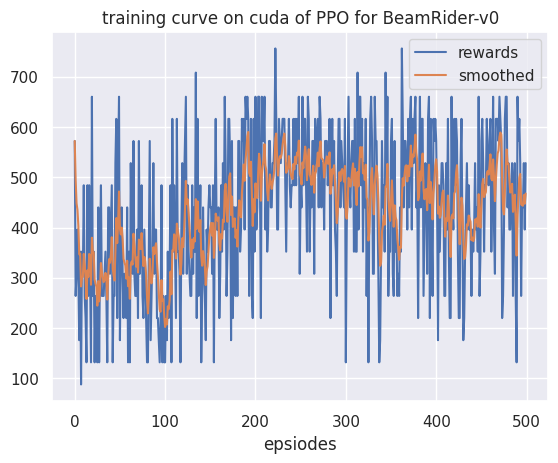

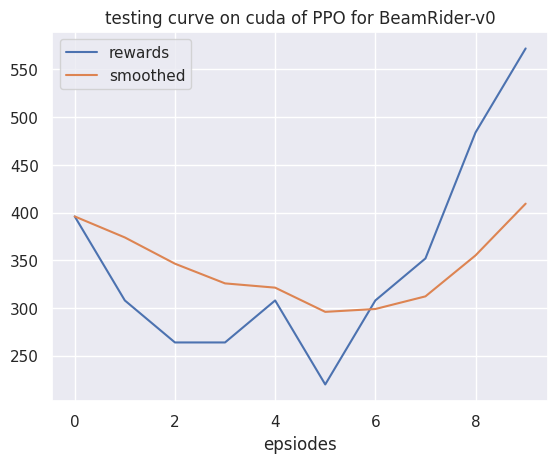

In [2]:
cfg = Config()
# 训练
env, agent = env_agent_config(cfg)
best_agent,res_dic = train(cfg, env, agent)
 
plot_rewards(res_dic['rewards'], cfg, tag="train")  
# 测试
res_dic = test(cfg, env, best_agent)
plot_rewards(res_dic['rewards'], cfg, tag="test")  # 画出结果

In [5]:
best_agent,res_dic = train(cfg, env, agent)

开始训练！
回合：20/500，奖励：264.00，评估奖励：484.00，最佳评估奖励：484.00，更新模型！1766.9 0.08
回合：40/500，奖励：176.00，评估奖励：352.00，最佳评估奖励：484.00，1600.3 0.07
回合：60/500，奖励：176.00，评估奖励：88.00，最佳评估奖励：484.00，1660.6 0.07
回合：80/500，奖励：352.00，评估奖励：484.00，最佳评估奖励：484.00，更新模型！1662.2 0.07
回合：100/500，奖励：264.00，评估奖励：660.00，最佳评估奖励：660.00，更新模型！1583.3 0.07
回合：120/500，奖励：396.00，评估奖励：88.00，最佳评估奖励：660.00，1782.7 0.07
回合：140/500，奖励：484.00，评估奖励：308.00，最佳评估奖励：660.00，1715.35 0.07
回合：160/500，奖励：572.00，评估奖励：440.00，最佳评估奖励：660.00，1714.0 0.07
回合：180/500，奖励：528.00，评估奖励：660.00，最佳评估奖励：660.00，更新模型！1693.1 0.07
回合：200/500，奖励：616.00，评估奖励：616.00，最佳评估奖励：660.00，1797.95 0.07
回合：220/500，奖励：484.00，评估奖励：440.00，最佳评估奖励：660.00，1872.95 0.07
回合：240/500，奖励：528.00，评估奖励：440.00，最佳评估奖励：660.00，1860.15 0.07
回合：260/500，奖励：352.00，评估奖励：0.00，最佳评估奖励：660.00，1849.25 0.07
回合：280/500，奖励：572.00，评估奖励：352.00，最佳评估奖励：660.00，1922.45 0.07
回合：300/500，奖励：660.00，评估奖励：0.00，最佳评估奖励：660.00，1713.55 0.07
回合：320/500，奖励：616.00，评估奖励：0.00，最佳评估奖励：660.00，1798.8 0.07
回合：340/500，奖励：440.00，评估奖励：0.00，最佳评估

In [8]:
agent_temp = torch.load('./Data/BeamRider-v0-RAM-Noise/2-440-500-572.0.pt')

2 tensor(2.7627) tensor([7.8545e-12, 1.0000e+00, 1.2837e-12, 8.8928e-12, 1.4310e-12, 6.3827e-12,
        5.4592e-12, 3.4478e-12, 6.6120e-10]) 0.0
1 tensor(2.5579) tensor([2.1600e-13, 1.0000e+00, 2.7574e-14, 2.5075e-13, 3.1148e-14, 1.7209e-13,
        1.4301e-13, 8.4927e-14, 3.3881e-11]) 0.0
1 tensor(2.6202) tensor([5.1294e-14, 1.0000e+00, 5.9349e-15, 6.0185e-14, 6.7396e-15, 4.0568e-14,
        3.3325e-14, 1.9312e-14, 1.0306e-11]) 0.0
1 tensor(2.7746) tensor([8.8308e-14, 1.0000e+00, 1.0596e-14, 1.0311e-13, 1.2014e-14, 6.9959e-14,
        5.7719e-14, 3.3767e-14, 1.6184e-11]) 0.0
1 tensor(2.4814) tensor([7.8569e-12, 1.0000e+00, 1.2833e-12, 8.8873e-12, 1.4309e-12, 6.3824e-12,
        5.4620e-12, 3.4495e-12, 6.5957e-10]) 0.0
1 tensor(2.5155) tensor([9.2035e-12, 1.0000e+00, 1.5194e-12, 1.0397e-11, 1.6935e-12, 7.4812e-12,
        6.4104e-12, 4.0598e-12, 7.5204e-10]) 0.0
1 tensor(2.5371) tensor([7.2000e-12, 1.0000e+00, 1.1688e-12, 8.1464e-12, 1.3038e-12, 5.8443e-12,
        4.9981e-12, 3.1522e

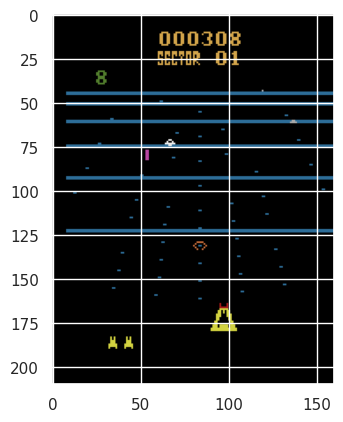

In [9]:
from IPython import display
import matplotlib.pyplot as plt
cfg = Config() 
env, agent = env_agent_config(cfg)
draw_agent = agent_temp
# draw_agent = best_agent
show_image = True
draw_agent.actor.eval()
NUM_OF_TEST = 1
test_total_reward = []
action_list = []
actor_out = []
actions = []
critic_list = []
reward_list = []
count = 0
for i in range(NUM_OF_TEST):
    state = env.reset()
    unwrapped_env = env.unwrapped
    state = unwrapped_env.ale.getRAM()
    total_reward = 0
    done = False
    if show_image:
        img = plt.imshow(env.render(mode='rgb_array'))
    while not done:
        action = draw_agent.predict_action(state)
        if count % 40 == 0:
            action = 2
        actor_out.append(draw_agent.actor(to_tensor(state, cfg)))
        actions.append(action)
        critic_list.append(draw_agent.critic(to_tensor(state, cfg)))
        state, reward, done, _ = env.step(action)
        state = unwrapped_env.ale.getRAM()
        total_reward += reward
        reward_list.append(reward)

        if show_image:
            img.set_data(env.render(mode='rgb_array'))
            display.display(plt.gcf())
            display.clear_output(wait=True)
        count += 1
        if count == 600:
            break

for i in range(len(actor_out)):
    print(actions[i],critic_list[i].detach().cpu()[0],actor_out[i].detach().cpu()[0], reward_list[i])
draw_agent.actor.train()
print("length of actions is ", len(actions))


tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0884, 0.0000]]]],
       grad_fn=<ToCopyBackward0>)

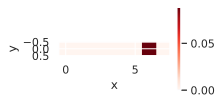

In [5]:
d2l.show_heatmaps(draw_agent.actor.atten.view(1, 1, 1, 8).cpu(), 'x', 'y')
draw_agent.actor.atten.view(1, 1, 1, 8).cpu()

In [13]:
torch.save(best_agent, './Data/BeamRider-v0-RAM-None/Ex1_Best.pt')